In [1]:
import pandas as pd 
from psycopg2 import connect
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from sqlalchemy.engine import create_engine

In [2]:
params = {
    'host': '13.58.184.120',
    'user': 'ubuntu',
    'port': 5432
}

#Connect and create database, disconnect, and reconnect to the right database
connection = connect(**params, dbname='ubuntu')
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
#connection.cursor().execute('CREATE DATABASE h1b_2018;')
connection.close()

In [4]:
connection = connect(**params, dbname='h1b_2018')
cursor = connection.cursor()
cursor.execute("""SELECT * FROM h1b_2018 limit 20""")
cursor.fetchall()

[('I-200-18026-338377',
  'CERTIFIED',
  datetime.datetime(2018, 1, 29, 0, 0),
  datetime.datetime(2018, 2, 2, 0, 0),
  'H-1B',
  datetime.datetime(2018, 7, 28, 0, 0),
  datetime.datetime(2021, 7, 27, 0, 0),
  'MICROSOFT CORPORATION',
  None,
  '1 MICROSOFT WAY',
  'REDMOND',
  'WA',
  '98052',
  'UNITED STATES OF AMERICA',
  None,
  '4258828080',
  None,
  'N',
  ',',
  None,
  None,
  'SOFTWARE ENGINEER',
  '15-1132',
  'SOFTWARE DEVELOPERS, APPLICATIONS',
  51121.0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  'Y',
  112549.0,
  'Year',
  'Level II',
  'OES',
  '2017',
  'OFLC ONLINE DATA CENTER',
  143915.0,
  0.0,
  'Year',
  'N',
  'N',
  'NA',
  None,
  None,
  'REDMOND',
  'KING',
  'WA',
  '98052',
  None),
 ('I-200-17296-353451',
  'CERTIFIED',
  datetime.datetime(2017, 10, 23, 0, 0),
  datetime.datetime(2017, 10, 27, 0, 0),
  'H-1B',
  datetime.datetime(2017, 11, 6, 0, 0),
  datetime.datetime(2020, 11, 6, 0, 0),
  'ERNST & YOUNG U.S. LLP',
  None,
  '200 PLAZA DRIVE',
  'SECAUCUS',


In [64]:
df = pd.read_csv('convert.csv')

/anaconda3/envs/metis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df1 = df[['CASE_STATUS', 'DECISION_DATE', 'VISA_CLASS', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS','FULL_TIME_POSITION','PREVAILING_WAGE','PW_UNIT_OF_PAY','PW_SOURCE','PW_SOURCE_YEAR','PW_SOURCE_OTHER', 'WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','H1B_DEPENDENT','WILLFUL_VIOLATOR','WORKSITE_STATE','WORKSITE_POSTAL_CODE']]  







In [10]:
df1.head()

,CASE_STATUS,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,CERTIFIED,02-02-18,H-1B,MICROSOFT CORPORATION,WA,"SOFTWARE DEVELOPERS, APPLICATIONS",51121.0,1,Y,112549.0,Year,OES,2017.0,OFLC ONLINE DATA CENTER,0.0,Year,N,N,WA,98052
1,CERTIFIED,10-27-17,H-1B,ERNST & YOUNG U.S. LLP,NJ,ACCOUNTANTS AND AUDITORS,541211.0,1,Y,79976.0,Year,OES,2017.0,OFLC ONLINE DATA CENTER,0.0,Year,N,N,CA,95110
2,CERTIFIED,09-06-18,H-1B,LOGIXHUB LLC,TX,DATABASE ADMINISTRATORS,541511.0,1,Y,77792.0,Year,OES,2018.0,OFLC ONLINE DATA CENTER,0.0,Year,N,N,TX,75062
3,CERTIFIED,03-30-18,H-1B,"HEXAWARE TECHNOLOGIES, INC.",NJ,"SOFTWARE DEVELOPERS, APPLICATIONS",541511.0,5,Y,84406.0,Year,OES,2017.0,OFLC ONLINE DATA CENTER,85000.0,Year,Y,N,DE,19720
4,CERTIFIED,09-07-18,H-1B,"ECLOUD LABS,INC.",NJ,"SOFTWARE DEVELOPERS, APPLICATIONS",541511.0,1,Y,87714.0,Year,OES,2018.0,OFLC ONLINE DATA CENTER,0.0,Year,Y,N,AL,35244


In [18]:
df1['CASE_SUBMITTED_YEAR'] = pd.to_datetime(df1['DECISION_DATE']).dt.year

/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1['CASE_SUBMITTED_DAY'] = pd.to_datetime(df1['DECISION_DATE']).dt.day

/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df1['CASE_SUBMITTED_MONTH'] = pd.to_datetime(df1['DECISION_DATE']).dt.month

/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df1.drop(['PW_SOURCE','PW_SOURCE_YEAR','PW_SOURCE_OTHER','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY'],axis=1,inplace=True)

/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 18 columns):
CASE_STATUS             654360 non-null object
DECISION_DATE           654360 non-null object
VISA_CLASS              654360 non-null object
EMPLOYER_NAME           654341 non-null object
EMPLOYER_STATE          654287 non-null object
SOC_NAME                654349 non-null object
NAICS_CODE              654354 non-null float64
TOTAL_WORKERS           654360 non-null int64
FULL_TIME_POSITION      654354 non-null object
PREVAILING_WAGE         654357 non-null float64
PW_UNIT_OF_PAY          654303 non-null object
H1B_DEPENDENT           640204 non-null object
WILLFUL_VIOLATOR        640199 non-null object
WORKSITE_STATE          654345 non-null object
WORKSITE_POSTAL_CODE    654330 non-null object
CASE_SUBMITTED_YEAR     654360 non-null int64
CASE_SUBMITTED_DAY      654360 non-null int64
CASE_SUBMITTED_MONTH    654360 non-null int64
dtypes: float64(2), int64(4), object(12)
memo

In [25]:
df1['VISA_CLASS'].value_counts()

H-1B               639519
E-3 Australian      12566
H-1B1 Singapore      1267
H-1B1 Chile          1008
Name: VISA_CLASS, dtype: int64

In [26]:
df1['CASE_STATUS'].value_counts()

CERTIFIED              579449
CERTIFIED-WITHDRAWN     45004
WITHDRAWN               21280
DENIED                   8627
Name: CASE_STATUS, dtype: int64

In [49]:
df1 = df1[(df1['VISA_CLASS'] != 'E-3 Australian') & (df1['VISA_CLASS'] !='H-1B1 Chile') &(df1['VISA_CLASS'] !='H-1B1 Singapore')]




In [30]:
df1 = df1[(df1['CASE_STATUS'] != 'WITHDRAWN') & (df1['CASE_STATUS'] != 'CERTIFIED-WITHDRAWN')]

In [31]:
df1['CASE_STATUS'].value_counts()

CERTIFIED    579449
DENIED         8627
Name: CASE_STATUS, dtype: int64

In [32]:
df1['PW_UNIT_OF_PAY'].value_counts()

Year         547280
Hour          40349
Month           267
Week             88
Bi-Weekly        41
Name: PW_UNIT_OF_PAY, dtype: int64

In [33]:
df1 = df1[(df1['PW_UNIT_OF_PAY'] != 'Hour') & (df1['PW_UNIT_OF_PAY'] != 'Month') & (df1['PW_UNIT_OF_PAY'] != 'Week') & (df1['PW_UNIT_OF_PAY'] != 'Bi-Weekly')]


In [34]:
df1['CASE_STATUS'].value_counts()

CERTIFIED    540350
DENIED         6981
Name: CASE_STATUS, dtype: int64

In [35]:
df1.drop(['PW_UNIT_OF_PAY'],axis=1,inplace=True)

In [46]:
df1.rename(columns ={'FULL_TIME_POSITION':'FULL_TIME_POSITION_Y(1)_N(0)','H1B_DEPENDENT':'H-1B_DEPENDENT_Y(1)_N(0)','WILLFUL_VIOLATOR':'WILLFUL_VIOLATOR_Y(1)_N(0)'},inplace=True)

In [50]:
df1['VISA_CLASS'].value_counts()

H-1B    535317
Name: VISA_CLASS, dtype: int64

In [41]:
df1.drop(['WORKSITE_POSTAL_CODE'],axis=1,inplace=True)

In [42]:
df1.drop(['WORKSITE_STATE'],axis=1,inplace=True)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547331 entries, 0 to 654359
Data columns (total 15 columns):
CASE_STATUS                     547331 non-null object
DECISION_DATE                   547331 non-null object
VISA_CLASS                      547331 non-null object
EMPLOYER_NAME                   547316 non-null object
EMPLOYER_STATE                  547272 non-null object
SOC_NAME                        547329 non-null object
NAICS_CODE                      547327 non-null float64
TOTAL_WORKERS                   547331 non-null int64
FULL_TIME_POSITION_Y(1)_N(0)    547327 non-null object
PREVAILING_WAGE                 547330 non-null float64
H1B_DEPENDENT                   535826 non-null object
WILLFUL_VIOLATOR_Y(1)_N(0)      535822 non-null object
CASE_SUBMITTED_YEAR             547331 non-null int64
CASE_SUBMITTED_DAY              547331 non-null int64
CASE_SUBMITTED_MONTH            547331 non-null int64
dtypes: float64(2), int64(4), object(9)
memory usage: 66.8+ MB


In [52]:
df1.drop(['VISA_CLASS','NAICS_CODE'],axis=1, inplace=True)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535317 entries, 0 to 654359
Data columns (total 13 columns):
CASE_STATUS                     535317 non-null object
DECISION_DATE                   535317 non-null object
EMPLOYER_NAME                   535303 non-null object
EMPLOYER_STATE                  535282 non-null object
SOC_NAME                        535315 non-null object
TOTAL_WORKERS                   535317 non-null int64
FULL_TIME_POSITION_Y(1)_N(0)    535313 non-null object
PREVAILING_WAGE                 535316 non-null float64
H-1B_DEPENDENT_Y(1)_N(0)        535310 non-null object
WILLFUL_VIOLATOR_Y(1)_N(0)      535309 non-null object
CASE_SUBMITTED_YEAR             535317 non-null int64
CASE_SUBMITTED_DAY              535317 non-null int64
CASE_SUBMITTED_MONTH            535317 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 57.2+ MB


In [59]:
df1.to_csv('secondDFF.csv',index=False)

In [58]:
df1.drop(['DECISION_DATE'],axis=1,inplace=True)

In [60]:
df1['FULL_TIME_POSITION_Y(1)_N(0)'].value_counts()

Y    535300
N        13
Name: FULL_TIME_POSITION_Y(1)_N(0), dtype: int64

### Working on the original data

In [61]:
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE,DECISION_YEAR,DECISION_DAY,DECISION_MONTH,CASE_SUBMITTED_DAY,CASE_SUBMITTED_YEAR,CASE_SUBMITTED_MONTH
0,I-200-18026-338377,CERTIFIED,01-29-18,02-02-18,07-28-18,07-27-21,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,REDMOND,...,KING,WA,98052,NaN,2018,2,2,2,2018,2
1,I-200-17296-353451,CERTIFIED,10-23-17,10-27-17,11-06-17,11-06-20,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,SECAUCUS,...,SAN JOSE,CA,95110,NaN,2017,27,10,27,2017,10
2,I-200-18242-524477,CERTIFIED,08-30-18,09-06-18,09-10-18,09-09-21,LOGIXHUB LLC,NaN,320 DECKER DRIVE,IRVING,...,DALLAS,TX,75062,NaN,2018,6,9,6,2018,9
3,I-200-18070-575236,CERTIFIED,NaN,03-30-18,09-10-18,09-09-21,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,ISELIN,...,NEW CASTLE,DE,19720,NaN,2018,30,3,30,2018,3
4,I-200-18243-850522,CERTIFIED,08-31-18,09-07-18,09-07-18,09-06-21,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,ISELIN,...,SHELBY,AL,35244,NaN,2018,7,9,7,2018,9


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 52 columns):
CASE_NUMBER                    654360 non-null object
CASE_STATUS                    654360 non-null object
CASE_SUBMITTED                 654359 non-null object
DECISION_DATE                  654360 non-null object
VISA_CLASS                     654360 non-null object
EMPLOYMENT_START_DATE          654353 non-null object
EMPLOYMENT_END_DATE            654349 non-null object
EMPLOYER_NAME                  654341 non-null object
EMPLOYER_BUSINESS_DBA          53490 non-null object
EMPLOYER_ADDRESS               654349 non-null object
EMPLOYER_CITY                  654349 non-null object
EMPLOYER_STATE                 654287 non-null object
EMPLOYER_POSTAL_CODE           654342 non-null object
EMPLOYER_COUNTRY               654353 non-null object
EMPLOYER_PROVINCE              6705 non-null object
EMPLOYER_PHONE                 654353 non-null object
EMPLOYER_PHONE_EXT          

In [76]:
data_peeps=df.dropna(subset=['JOB_TITLE'])
data_peeps=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA')]
data_scientists=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA SCIENTIST')]
data_analyst=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ANALYST')]
data_eng=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ENG')]

In [79]:
df['PREVAILING_WAGE'].value_counts()

92768.0     7371
90646.0     6343
110864.0    5583
112549.0    3893
82098.0     3743
            ... 
60540.0        1
60523.0        1
60522.0        1
242070.0       1
68599.0        1
Name: PREVAILING_WAGE, Length: 27036, dtype: int64

### Salary for Data Related Jobs

In [86]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [101]:
sns.set(style="darkgrid")
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

In [102]:
df['YEAR'] = pd.to_datetime(df['DECISION_DATE']).dt.year

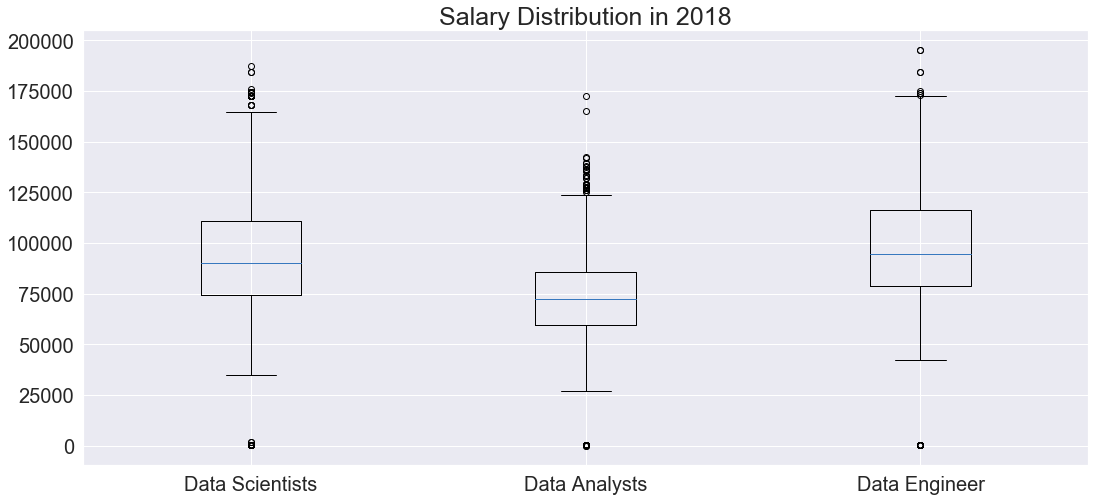

In [121]:
f,ax=plt.subplots(figsize=(18,8))
plt.boxplot([data_scientists[data_scientists['PREVAILING_WAGE']<200000].PREVAILING_WAGE,data_analyst[data_analyst['PREVAILING_WAGE']<200000].PREVAILING_WAGE,data_eng[data_eng['PREVAILING_WAGE']<200000].PREVAILING_WAGE])
ax.set_xticklabels(['Data Scientists','Data Analysts','Data Engineer'],fontsize=25)
ax.set_title('Salary Distribution in 2018', fontsize=25)
ax.tick_params(labelsize=20)
plt.show()


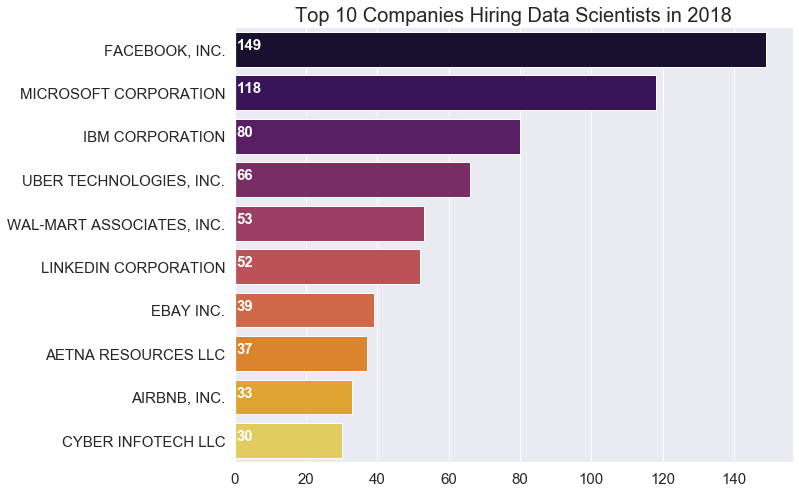

In [122]:
plt.figure(figsize=(10,8))
data_coun=data_scientists['EMPLOYER_NAME'].value_counts()[:10]
ax=sns.barplot(y=data_coun.index,x=data_coun.values,palette=sns.color_palette('inferno',10))
ax.tick_params(labelsize=15)

for i, v in enumerate(data_coun.values): 
    ax.text(.5, i, v,fontsize=15,color='white',weight='bold')
plt.title('Top 10 Companies Hiring Data Scientists in 2018', fontsize=20)
plt.show()

In [92]:
datadf = data_coun.reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
index            10 non-null object
EMPLOYER_NAME    10 non-null int64
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes
